In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [63]:
# Normalization
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [64]:
# Normalization
# total_bill and tip column is in continuous format so we make it in a range between 0-1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [65]:
df[['total_bill','tip']] = scaler.fit_transform(df[['total_bill','tip']])

In [66]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,0.291579,0.001111,Female,No,Sun,Dinner,2
1,0.152283,0.073333,Male,No,Sun,Dinner,3
2,0.375786,0.277778,Male,No,Sun,Dinner,3
3,0.431713,0.256667,Male,No,Sun,Dinner,2
4,0.450775,0.290000,Female,No,Sun,Dinner,4


C:\Users\yathi\AppData\Local\Temp\ipykernel_15096\2824874698.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[['total_bill']])


<Axes: ylabel='Density'>

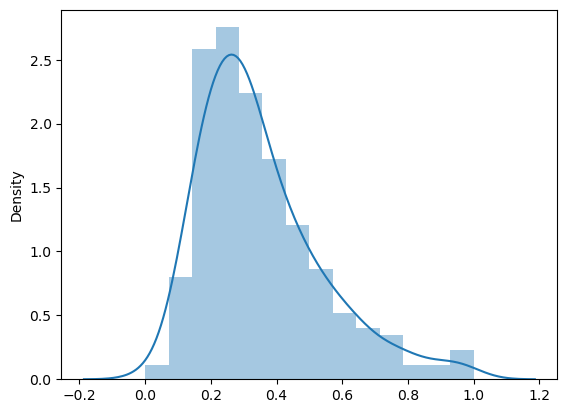

In [67]:
sns.distplot(x=df[['total_bill']])

In [68]:
# Standardization - converts in range between -1 to +1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [69]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,0.291579,0.001111,Female,No,Sun,Dinner,2
1,0.152283,0.073333,Male,No,Sun,Dinner,3
2,0.375786,0.277778,Male,No,Sun,Dinner,3
3,0.431713,0.256667,Male,No,Sun,Dinner,2
4,0.450775,0.290000,Female,No,Sun,Dinner,4


In [70]:
df.value_counts()

total_bill  tip       sex     smoker  day   time    size
0.208002    0.111111  Female  Yes     Thur  Lunch   2       2
0.056137    0.000000  Female  Yes     Fri   Dinner  2       1
0.000000    0.000000  Female  Yes     Sat   Dinner  1       1
0.087558    0.461111  Male    Yes     Sun   Dinner  2       1
0.093004    0.111111  Male    No      Thur  Lunch   2       1
                                                           ..
0.885630    0.277778  Male    Yes     Sun   Dinner  3       1
0.944700    0.444444  Male    No      Sun   Dinner  6       1
0.946795    0.636667  Male    No      Sat   Dinner  4       1
0.948052    0.888889  Male    No      Sat   Dinner  4       1
1.000000    1.000000  Male    Yes     Sat   Dinner  3       1
Name: count, Length: 243, dtype: int64

In [71]:
# Categorical Encoding - One-Hot Encoding
df['sex'] = df['sex'].map({'Female':1, 'Male':0})

In [72]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,0.291579,0.001111,1,No,Sun,Dinner,2
1,0.152283,0.073333,0,No,Sun,Dinner,3
2,0.375786,0.277778,0,No,Sun,Dinner,3
3,0.431713,0.256667,0,No,Sun,Dinner,2
4,0.450775,0.290000,1,No,Sun,Dinner,4


In [73]:
# get_dummies
df = pd.get_dummies(df, columns=['smoker'])

In [74]:
df.head()

,total_bill,tip,sex,day,time,size,smoker_Yes,smoker_No
0,0.291579,0.001111,1,Sun,Dinner,2,False,True
1,0.152283,0.073333,0,Sun,Dinner,3,False,True
2,0.375786,0.277778,0,Sun,Dinner,3,False,True
3,0.431713,0.256667,0,Sun,Dinner,2,False,True
4,0.450775,0.290000,1,Sun,Dinner,4,False,True


In [75]:
df['smoker_No'].value_counts()

smoker_No
True     151
False     93
Name: count, dtype: int64

In [77]:
# Feature Engineering - Creating new columns from existing ones

In [78]:
# Dimentionality reduction : (PCA- principal component analysis)

In [84]:
data = {
        'Bedrooms' : [1,2,3,4,5,6,7,8],
        'Bathrooms': [1,2,2,2,2,3,3,3],
        'Rentprice':[10000,10000,20000,20000,25000,40000,450000,50000]
}
df = pd.DataFrame(data)

In [85]:
from sklearn.decomposition import PCA
x = df[['Bedrooms','Bathrooms']]
pca = PCA(n_components=1)
principal_components = pca.fit_transform(x)
df['principal_component'] = principal_components
df.head()


,Bedrooms,Bathrooms,Rentprice,principal_component
0,1,1,10000,-3.703584
1,2,2,10000,-2.480416
2,3,2,20000,-1.513916
3,4,2,20000,-0.547417
4,5,2,25000,0.419083


In [88]:
df.corr()

,Bedrooms,Bathrooms,Rentprice,principal_component
Bedrooms,1.000000,0.907265,0.491805,0.999546
Bathrooms,0.907265,1.000000,0.500388,0.919525
Rentprice,0.491805,0.500388,1.000000,0.495464
principal_component,0.999546,0.919525,0.495464,1.000000


In [89]:
df2 = sns.load_dataset('tips')

In [90]:
df2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='Count'>

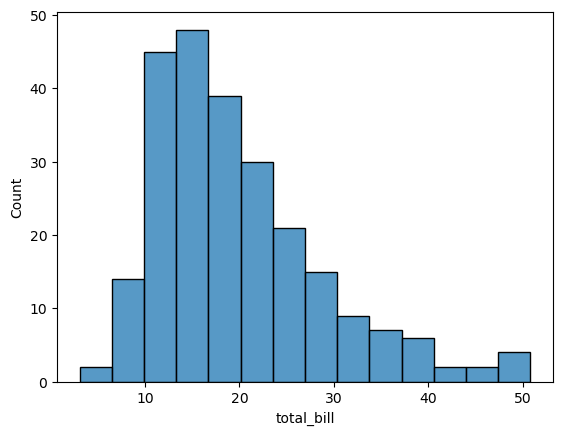

In [94]:
#Data Discretization
sns.histplot(df2['total_bill'])

In [97]:
bins = [0,15,30,50]
df2['total_bill'] = pd.cut(df2['total_bill'], bins=bins, labels=['SmallBill', 'MedBill', 'HighBill'])

In [99]:
df2.head()

,total_bill,tip,sex,smoker,day,time,size
0,MedBill,1.01,Female,No,Sun,Dinner,2
1,SmallBill,1.66,Male,No,Sun,Dinner,3
2,MedBill,3.50,Male,No,Sun,Dinner,3
3,MedBill,3.31,Male,No,Sun,Dinner,2
4,MedBill,3.61,Female,No,Sun,Dinner,4


In [102]:
df2['total_bill'].value_counts()

total_bill
MedBill      132
SmallBill     80
HighBill      31
Name: count, dtype: int64

In [109]:
# Data Balancing
x = sns.load_dataset('tips')
y = x['smoker']
x_inputs = x.drop(['smoker'],axis=1)

from imblearn.over_sampling import SMOTE
# SMOTE -> Synthetic minority oversmpling technique

In [111]:
#sampler = SMOTE()
#x_new = sampler.fit_resample(x_inputs, y)